<a href="https://colab.research.google.com/github/Markan281/misp/blob/main/Zadanie_z_doborem_rezystancji_dla_najmniejszej_mocyZaj%C4%99cia5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Naszym zadaniem było dobrać tak rezystancję aby na mostku odłożyło się jak najmniej mocy przy parametrach ograniczajacych podanych w tabeli:
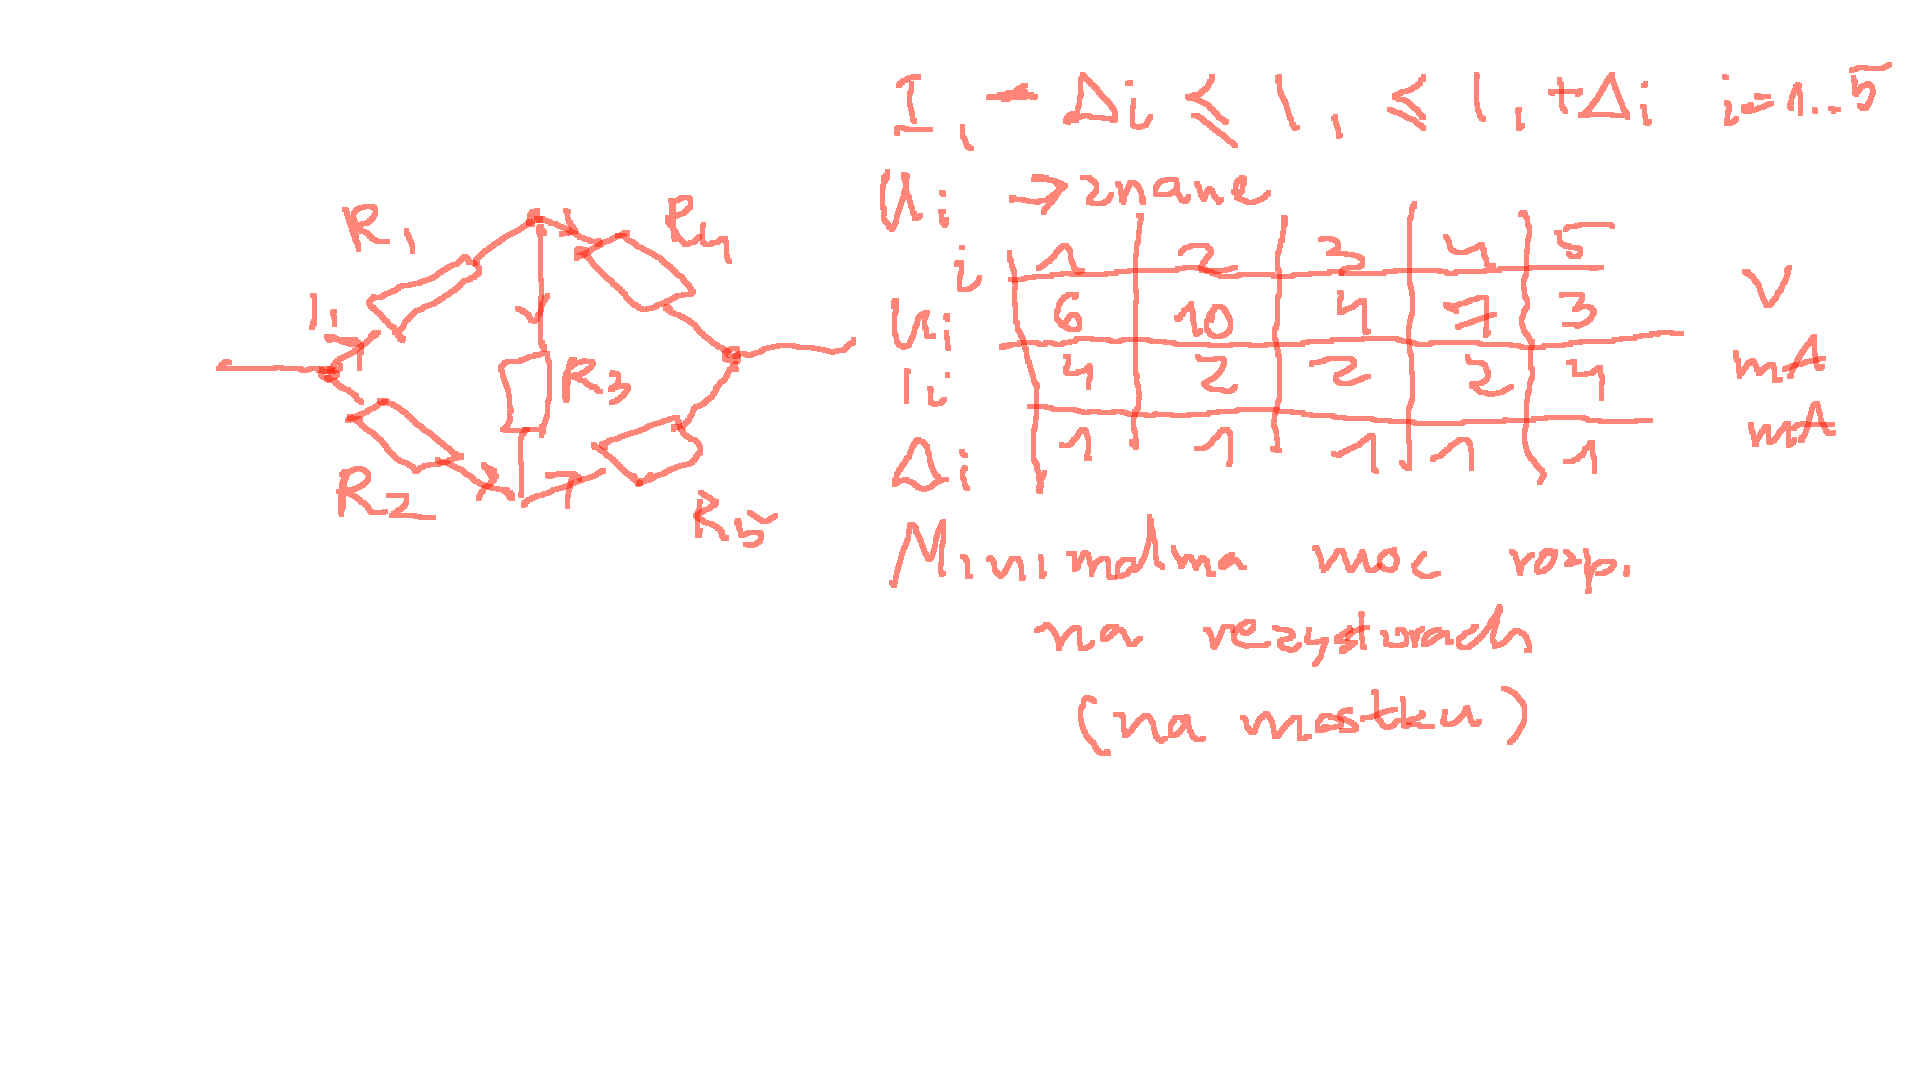

---



In [1]:
!pip install pulp
import pulp
print(pulp.__version__)
!sudo apt-get install coinor-cbc glpk-utils coinor-clp
from pulp import *

     |████████████████████████████████| 40.6MB 108kB/s 
2.3.1
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  coinor-libcbc3 coinor-libcgl1 coinor-libclp1 coinor-libcoinutils3v5
  coinor-libosi1v5 libamd2 libcolamd2 libglpk40 libsuitesparseconfig5
Suggested packages:
  libiodbc2-dev default-libmysqlclient-dev
The following NEW packages will be installed:
  coinor-cbc coinor-clp coinor-libcbc3 coinor-libcgl1 coinor-libclp1
  coinor-libcoinutils3v5 coinor-libosi1v5 glpk-utils libamd2 libcolamd2
  libglpk40 libsuitesparseconfig5
0 upgraded, 12 newly installed, 0 to remove and 14 not upgraded.
Need to get 3,439 kB of archives.
After this operation, 9,832 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libsuitesparseconfig5 amd64 1:5.1.2-2 [9,044 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libamd2 amd64 1:5.1.2-2 [19.5 kB]


In [2]:
#napięcia z tabeli

U1=6
U2=10
U3=4
U4=7
U5=3

In [6]:
#Zdefiniowanie problemu i zmiennych decyzyjnych
problem_moc = LpProblem("Problem_moc", LpMinimize)

I_1 = LpVariable('I_1', lowBound=0, cat='Continuous')
I_2 = LpVariable('I_2', lowBound=0, cat='Continuous')
I_3 = LpVariable('I_3', lowBound=0, cat='Continuous')
I_4 = LpVariable('I_4', lowBound=0, cat='Continuous')
I_5 = LpVariable('I_5', lowBound=0, cat='Continuous')

In [7]:
# Funkcja celu
problem_moc += U1*I_1 + U2*I_2 + U3*I_3 + U4*I_4 + U5*I_5,  "mocR1"

# Ograniczenia na prądy w danej gałęzi
problem_moc += I_1 <= 0.005
problem_moc += I_1 >= 0.003
problem_moc += I_2 <= 0.003
problem_moc += I_2 >= 0.001
problem_moc += I_3 <= 0.003
problem_moc += I_3 >= 0.001
problem_moc += I_4 <= 0.003
problem_moc += I_4 >= 0.001
problem_moc += I_5 <= 0.005
problem_moc += I_5 >= 0.003


In [8]:
problem_moc.solve()
print (LpStatus[problem_moc.status])

Optimal


In [9]:
#Prądy wyliczone jakie będą płynąć.

print("I1 =", value(I_1))
print("I1 =", value(I_2))
print("I1 =", value(I_3))
print("I1 =", value(I_4))
print("I1 =", value(I_5))

I1 = 0.003
I1 = 0.001
I1 = 0.001
I1 = 0.001
I1 = 0.003


In [10]:
#Rezystancja oporników dla minimalnej mocy w układzie w ohmach
print("R1= ", U1/(value(I_1)))
print("R2= ", U2/(value(I_2)))
print("R3= ", U3/(value(I_3)))
print("R4= ", U4/(value(I_4)))
print("R5= ", U5/(value(I_5)))

R1=  2000.0
R2=  10000.0
R3=  4000.0
R4=  7000.0
R5=  1000.0
